# Loading and preliminary exploration of MOMI data

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import missingno as msno 
from matplotlib import pyplot as plt
import dexplot as dxp

In [2]:
system = 'windows'

In [3]:
# Prenatal Data
parent = os.path.dirname(os.getcwd())
if system == 'windows':
    dataPath = os.path.join(parent, r"Data\MOMI\Final_Prenatal_DeIdentified.xlsx")
    prenatal = pd.read_excel('file:\\' + dataPath)
else:
    dataPath = os.path.join(parent, r"Data/MOMI/Final_Prenatal_DeIdentified.xlsx")
    prenatal = pd.read_excel('file://' + dataPath)

In [4]:
# MOMI Data
parent = os.path.dirname(os.getcwd())
if system == 'windows':
    dataPath = os.path.join(parent, r"Data\MOMI\Final_MOMI_DeIdentified_Update_39Mar2021.xlsx")
    momi = pd.read_excel('file:\\' + dataPath)
else:
    dataPath = os.path.join(parent, r"Data/MOMI/Final_MOMI_DeIdentified_Update_39Mar2021.xlsx")
    momi = pd.read_excel('file://' + dataPath)

In [5]:
# Ultrasound Data
parent = os.path.dirname(os.getcwd())
if system == 'windows':
    dataPath = os.path.join(parent, r"Data\MOMI\Final_Ultrasound_DeIdentified.xlsx")
    ultrasound = pd.read_excel('file:\\' + dataPath)
else: 
    dataPath = os.path.join(parent, r"Data/MOMI/Final_Ultrasound_DeIdentified.xlsx")
    ultrasound = pd.read_excel('file://' + dataPath)

In [25]:
momi.shape

(234965, 98)

In [26]:
momi.columns

Index(['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear',
       'Has_Prenatal_Data', 'Has_Ultrasound_PlacLoc', 'DMOMAGE',
       'FatherAge_State', 'MomEducation_State', 'DadEducation_State',
       'NumCig3MoPriorToPreg_State', 'NumCigFirstTri_State',
       'NumCigSecondTri_State', 'NumCigThirdTri_State', 'Smoke_a', 'Smoke_b',
       'Alcohol_a', 'Alcohol_b', 'Race', 'Ethnicity', 'DFC', 'DELWKSGT',
       'MHXGRAV', 'MHXPARA', 'MHXABORT', 'PRIMIP', 'DMOMHGT', 'MOBRPWT',
       'MOBADMWT', 'FOBLABHR', 'FOBROMHR', 'CSREPEAT', 'FDELTYPE', 'MMULGSTD',
       'SINGLETON', 'FOBDEATH', 'MCNSMUSC', 'MCOLVASC', 'MCVDANAT', 'MCVDHTN',
       'MOBHTN', 'Gest_HTN', 'Mild_PE', 'Severe_PE', 'SIPE', 'Unspecified_HTN',
       'MDELCOMP', 'MDEPRESS', 'MENDDIAB', 'MENDTHY', 'MGIHYPER', 'MGILGBP',
       'MGUINFER', 'MGURENAL', 'MHEARTOPER', 'MHEMANEM', 'MHEMHGB', 'MHEMPLT',
       'MHEMTRAN', 'MIDBV', 'MIDCHLAM', 'MIDCONDY', 'MIDGBS', 'MIDGC',
       'MIDHEPB', 'MIDHSV', 'MIDTB', 'MIDTRICH', 'M

In [27]:
for c in momi.columns:
    print(f'----{c}----')
    print(momi[c].value_counts())
    print('')

----MOMI_ID----
15966726991979    12
72533917991982    10
24597557991986     9
18514468991977     9
95391216991982     9
                  ..
61936924991986     1
43855429991976     1
41849936991965     1
61775735991992     1
94442223991987     1
Name: MOMI_ID, Length: 153987, dtype: int64

----Delivery_Number_Per_Mother----
1     157973
2      56712
3      15101
4       3749
5        972
6        306
7        102
8         37
9          9
10         2
12         1
11         1
Name: Delivery_Number_Per_Mother, dtype: int64

----DeliveryYear----
2013    10960
2014    10835
2012    10663
2011    10329
2009     9986
2010     9958
2015     9886
2008     9784
2007     9565
2020     9303
2019     9299
2016     9150
2006     9066
2005     8995
2017     8826
2018     8562
1996     8429
1995     8409
2004     8341
2001     8183
1997     8035
2003     8028
2002     7996
2000     7964
1998     7324
1999     7089
Name: DeliveryYear, dtype: int64

----Has_Prenatal_Data----
0    188301
1     46664



----Venous_HTN----
0    234964
1         1
Name: Venous_HTN, dtype: int64

----Vitamin_D_Deficiency----
0    234891
1        74
Name: Vitamin_D_Deficiency, dtype: int64

----History_PTB----
0    234876
1        89
Name: History_PTB, dtype: int64

----Hist_Trophoblastic_Disease_2----
0    234911
1        54
Name: Hist_Trophoblastic_Disease_2, dtype: int64

----Infant_Number----
1     153987
2      58796
3      16306
4       4235
5       1106
6        348
7        119
8         48
9         16
10         2
12         1
11         1
Name: Infant_Number, dtype: int64

----InfSex----
M    119393
F    112954
U         6
f         1
Name: InfSex, dtype: int64

----NICULOS----
0.0      183049
1.0        5238
2.0        2672
3.0        1948
7.0        1535
          ...  
141.0         1
139.0         1
194.0         1
137.0         1
159.0         1
Name: NICULOS, Length: 166, dtype: int64

----IDEMBWT----
3250.0    761
3350.0    756
3340.0    753
3210.0    738
3230.0    735
         ... 
108

In [17]:
len(momi['MOMI_ID'].unique())

153987

So there are 153,987 unique moms in the dataset

In [27]:
momi.head()

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,Has_Prenatal_Data,Has_Ultrasound_PlacLoc,DMOMAGE,FatherAge_State,MomEducation_State,DadEducation_State,NumCig3MoPriorToPreg_State,...,History_PTB,Hist_Trophoblastic_Disease_2,Infant_Number,InfSex,NICULOS,IDEMBWT,IGROWTH,ICNSANAT,IIDSYPH,IIDUTI
0,11111167991974,1,1996,0,0,22.0,NaN,NaN,NaN,NaN,...,0,0,1,M,0.0,1200.0,1.0,0.0,0.0,0.0
1,11111167991974,2,1998,0,0,24.0,NaN,NaN,NaN,NaN,...,0,0,2,F,0.0,2988.0,0.0,0.0,0.0,0.0
2,11111281991979,1,2007,0,0,28.0,NaN,NaN,NaN,NaN,...,0,0,1,F,0.0,3560.0,0.0,0.0,0.0,0.0
3,11111281991979,2,2009,0,0,30.0,NaN,NaN,NaN,NaN,...,0,0,2,F,0.0,3355.0,0.0,0.0,0.0,0.0
4,11111281991979,3,2011,0,0,32.0,34.0,Bachelor's degree,Master's degree,0.0,...,0,0,3,M,0.0,4025.0,0.0,0.0,0.0,0.0


In [6]:
prenatal.head()

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,DELWKSGT,MMULGSTD,SINGLETON,PNV_Total_Number,PNV_GestAge,PNV_BP,PNV_Weight_Oz
0,98174825991981,3,2018,36.857143,10,1,7.0,8.285714,102/70,3024.0
1,98174825991981,3,2018,36.857143,10,1,7.0,9.714286,120/60,3056.0
2,98174825991981,3,2018,36.857143,10,1,7.0,14.857143,110/66,3184.0
3,98174825991981,3,2018,36.857143,10,1,7.0,19.857143,110/70,3289.0
4,98174825991981,3,2018,36.857143,10,1,7.0,25.857143,110/70,3395.0


In [5]:
prenatal.columns

Index(['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear', 'DELWKSGT',
       'MMULGSTD', 'SINGLETON', 'PNV_Total_Number', 'PNV_GestAge', 'PNV_BP',
       'PNV_Weight_Oz'],
      dtype='object')

In [6]:
for c in prenatal.columns:
    print(f'----{c}----')
    print(prenatal[c].value_counts())
    print('')

----MOMI_ID----
69829958991994    52
81587199991987    51
55736198991994    50
31755233991991    50
98866858991992    49
                  ..
76482981991987     1
47292967991988     1
74355553991982     1
25637813991993     1
37897869991987     1
Name: MOMI_ID, Length: 43969, dtype: int64

----Delivery_Number_Per_Mother----
1     276727
2     130771
3      40955
4      11165
5       3053
6       1027
7        366
8         97
9         26
10        10
12         3
11         1
Name: Delivery_Number_Per_Mother, dtype: int64

----DeliveryYear----
2019    84006
2016    80024
2020    78643
2018    77227
2017    75062
2015    69239
Name: DeliveryYear, dtype: int64

----DELWKSGT----
39.000000    33654
39.142857    19730
40.000000    17320
39.285714    15354
39.857143    15219
             ...  
16.428571        1
43.285714        1
39.142857        1
43.142857        1
17.571429        1
Name: DELWKSGT, Length: 313, dtype: int64

----MMULGSTD----
10    453405
2       8915
1       1476
5     

In [10]:
ultrasound.shape

(221277, 17)

In [9]:
ultrasound.head()

,MOMI_ID,DeliveryYear,Delivery_Number_Per_Mother,DELWKSGT,MMULGSTD,SINGLETON,USExamCategory,USExamType,USGestAge,USGestAgeType,FetusNumber,USPlacLoc_1,USPlacLoc_2,USPlacLoc_3,USPlacLoc_4,USPlacLoc_5,USPlacLoc_6
0,75721299991966,2011,1,39.0,10,1,Obstetric,Complete,22.1,LMP,1,1,NaN,NaN,NaN,NaN,NaN
1,75721299991966,2011,1,39.0,10,1,Obstetric,FollowUp,30.3,LMP,1,1,NaN,NaN,NaN,NaN,NaN
2,81155213991973,2011,1,37.0,10,1,Obstetric,FirstTrimester,9.7,LMP,1,8,NaN,NaN,NaN,NaN,NaN
3,81155213991973,2011,1,37.0,10,1,Obstetric,FirstTrimester,13.1,LMP,1,4,5.0,NaN,NaN,NaN,NaN
4,81155213991973,2011,1,37.0,10,1,Obstetric,Complete,19.4,LMP,1,1,NaN,NaN,NaN,NaN,NaN


In [7]:
ultrasound.columns

Index(['MOMI_ID', 'DeliveryYear', 'Delivery_Number_Per_Mother', 'DELWKSGT',
       'MMULGSTD', 'SINGLETON', 'USExamCategory', 'USExamType', 'USGestAge',
       'USGestAgeType', 'FetusNumber', 'USPlacLoc_1', 'USPlacLoc_2',
       'USPlacLoc_3', 'USPlacLoc_4', 'USPlacLoc_5', 'USPlacLoc_6'],
      dtype='object')

In [8]:
for c in ultrasound.columns:
    print(f'----{c}----')
    print(ultrasound[c].value_counts())
    print('')

----MOMI_ID----
35243577991982    140
72461946991978     60
31676118991982     60
74244418991986     59
88364615991995     56
                 ... 
99127148991980      1
64494431991989      1
48474724991979      1
72632552991983      1
22948915991988      1
Name: MOMI_ID, Length: 63452, dtype: int64

----DeliveryYear----
2014    29028
2013    28066
2019    26950
2012    24421
2018    22140
2020    21003
2017    19179
2015    17310
2016    16580
2011    16429
2010      171
Name: DeliveryYear, dtype: int64

----Delivery_Number_Per_Mother----
1    178369
2     36459
3      5196
4       948
5       230
6        53
7        14
8         8
Name: Delivery_Number_Per_Mother, dtype: int64

----DELWKSGT----
39.000000    35540
40.000000    19617
38.000000    16349
37.000000    15691
41.000000    11185
             ...  
20.285714        1
17.571429        1
17.142857        1
44.000000        1
43.142857        1
Name: DELWKSGT, Length: 305, dtype: int64

----MMULGSTD----
10    196109
2      2199

In [ ]:
ultrasound.rename(columns={})

# Missing Values

## MOMI Missing

In [6]:
# Fix MOMI missing values to np.NaN
momi['MIDBV'] = np.where(momi['MIDBV'] == 99, np.NaN, momi['MIDBV'])
momi['MIDCHLAM'] = np.where(momi['MIDCHLAM'] == 99, np.NaN, momi['MIDCHLAM'])
momi['MIDCONDY'] = np.where(momi['MIDCONDY'] == 99, np.NaN, momi['MIDCONDY'])
momi['MIDGC'] = np.where(momi['MIDGC'] == 99, np.NaN, momi['MIDGC'])
momi['MIDHEPB'] = np.where(momi['MIDHEPB'] == 99, np.NaN, momi['MIDHEPB'])
momi['MIDTRICH'] = np.where(momi['MIDTRICH'] == 99, np.NaN, momi['MIDTRICH'])
momi['MIDGBS'] = np.where(momi['MIDGBS'] == 99, np.NaN, momi['MIDGBS'])
momi['MomEducation_State'] = np.where(momi['MomEducation_State'] == 'Unknown', np.NaN, momi['MomEducation_State'])
momi['DadEducation_State'] = np.where(momi['DadEducation_State'] == 'Unknown', np.NaN, momi['DadEducation_State'])
momi['Smoke_b'] = np.where(momi['Smoke_b'] == 'Unknown (unable to assess)', np.NaN, momi['Smoke_b'])
momi['Race'] = np.where(momi['Race'].isin(['D', '9', 'A']), np.NaN, momi['Race'])
momi['Ethnicity'] = np.where(momi['Ethnicity'].isin(['DECLINED', 'UNSPECIFIED']), np.NaN, momi['Ethnicity'])
momi['InfSex'] = np.where(momi['InfSex'] == 'U', np.NaN, momi['InfSex'])
momi['InfSex'] = np.where(momi['InfSex'] == 'f', 'F', momi['InfSex'])

In [ ]:
msno.matrix(momi)

<AxesSubplot:>

## Missingness Heatmap
A value near -1 means if one variable appears then the other variable is very likely to be missing.

A value near 0 means there is no dependence between the occurrence of missing values of two variables.

A value near 1 means if one variable appears then the other variable is very likely to be present.

<AxesSubplot:>

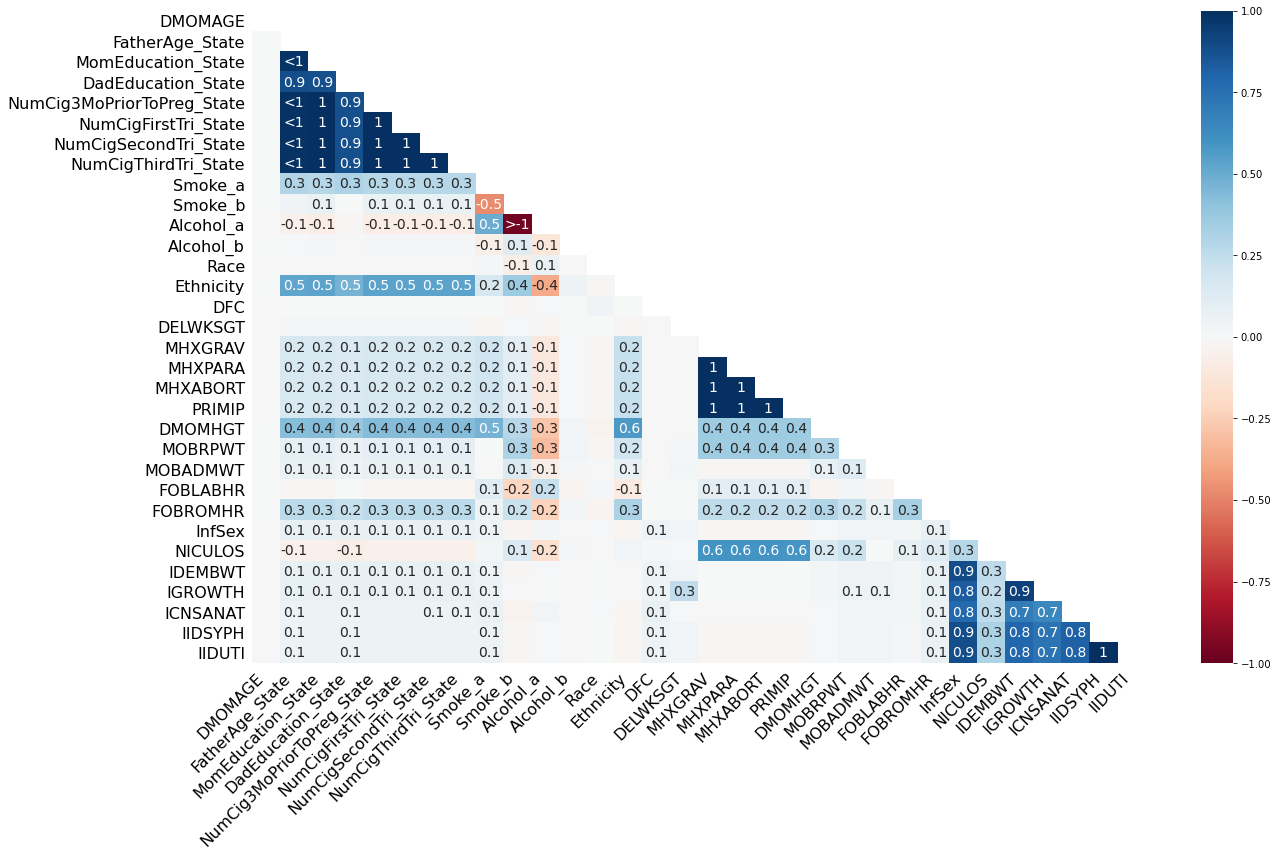

In [245]:
msno.heatmap(momi)

In [338]:
pd.set_option('display.max_rows', None)
momi.isnull().sum()/len(momi)*100

MOMI_ID                          0.000000
Delivery_Number_Per_Mother       0.000000
DeliveryYear                     0.000000
Has_Prenatal_Data                0.000000
Has_Ultrasound_PlacLoc           0.000000
DMOMAGE                          0.001277
FatherAge_State                 61.454259
MomEducation_State              60.869066
DadEducation_State              66.843572
NumCig3MoPriorToPreg_State      60.768200
NumCigFirstTri_State            60.768200
NumCigSecondTri_State           60.771179
NumCigThirdTri_State            60.771604
Smoke_a                         55.173324
Smoke_b                         78.198881
Alcohol_a                       23.097908
Race                             0.482625
Ethnicity                       44.643670
DFC                              0.005958
DELWKSGT                         0.099589
MHXGRAV                          4.664950
MHXPARA                          4.664950
MHXABORT                         4.664950
PRIMIP                           4

In [334]:
momi['Alcohol_b'].isnull().sum()/len(momi)*100

99.5497201710893

In [7]:
momi.drop(columns='Alcohol_b',inplace=True)

In [35]:
momi.iloc[:,5:].isnull().sum()

DMOMAGE                            3
FatherAge_State               144396
MomEducation_State            143021
DadEducation_State            157059
NumCig3MoPriorToPreg_State    142784
                               ...  
IDEMBWT                         3030
IGROWTH                         3491
ICNSANAT                        1828
IIDSYPH                         2754
IIDUTI                          2754
Length: 93, dtype: int64

## Prenatal Missing

In [217]:
prenatal.isnull().sum()

MOMI_ID                           0
Delivery_Number_Per_Mother        0
DeliveryYear                      0
DELWKSGT                         18
MMULGSTD                          0
SINGLETON                         0
PNV_Total_Number               7444
PNV_GestAge                    7444
PNV_BP                        12306
PNV_Weight_Oz                 13194
dtype: int64

<AxesSubplot:>

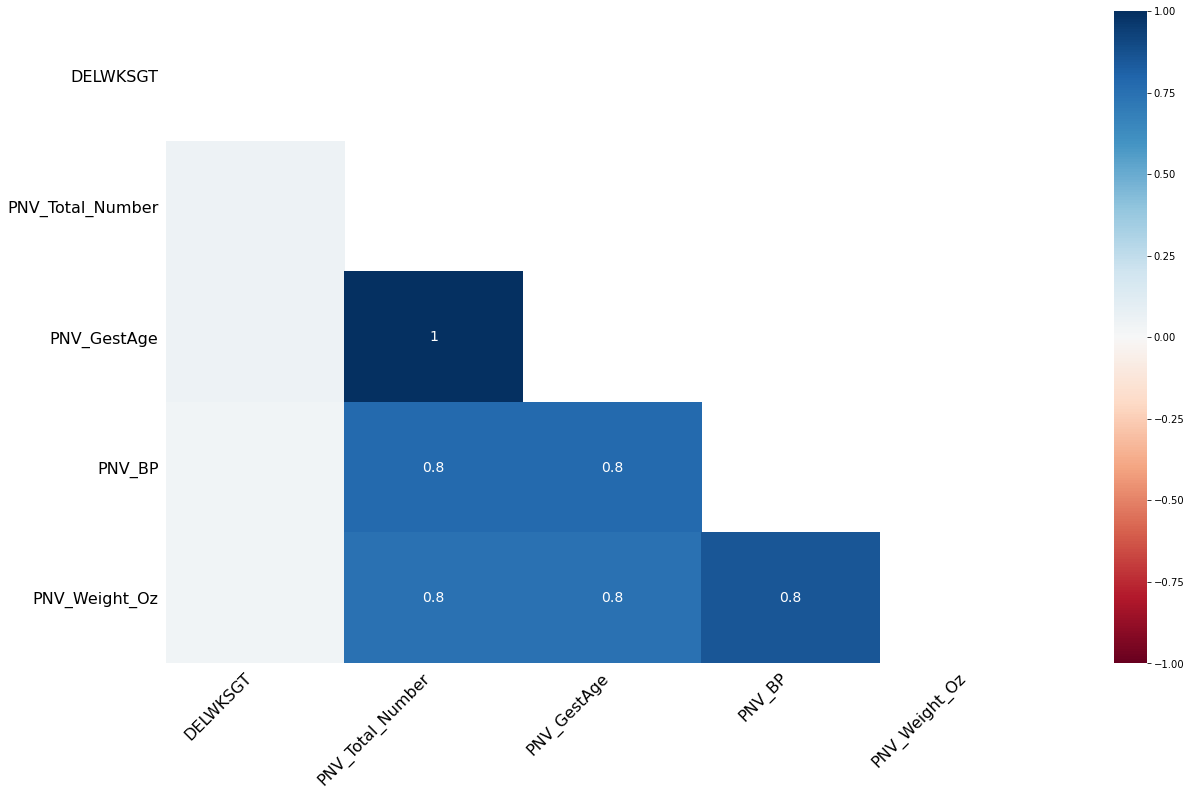

In [304]:
msno.heatmap(prenatal)

First take a look at DELWKSGT, doesn't seem to have any information that isn't in momi general

In [234]:
prenatal[prenatal['DELWKSGT'].isnull()].sort_values(by=['MOMI_ID'])

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,DELWKSGT,MMULGSTD,SINGLETON,PNV_Total_Number,PNV_GestAge,PNV_BP,PNV_Weight_Oz
13669,12388244991990,5,2020,NaN,10,1,NaN,NaN,NaN,NaN
209580,15578298991985,2,2016,NaN,10,1,NaN,NaN,NaN,NaN
87846,18764152991986,3,2020,NaN,10,1,NaN,NaN,NaN,NaN
30317,23531175991988,2,2015,NaN,10,1,NaN,NaN,NaN,NaN
148081,26943825991992,3,2020,NaN,10,1,NaN,NaN,NaN,NaN
92530,31383892991992,2,2020,NaN,10,1,NaN,NaN,NaN,NaN
407106,31669912991996,2,2018,NaN,10,1,NaN,NaN,NaN,NaN
203577,34155533991992,1,2018,NaN,10,1,NaN,NaN,NaN,NaN
351992,37216313991975,1,2017,NaN,10,1,NaN,NaN,NaN,NaN
99090,37833445992002,2,2019,NaN,10,1,NaN,NaN,NaN,NaN


In [236]:
# A list of values that have missing birthweight in prenatal
missingweightIDs = list(prenatal[prenatal['DELWKSGT'].isnull()]['MOMI_ID'].values)

In [250]:
# I'm fairly sure I can safely drop these - they match up with moms that have no prenatal data
prenatal[prenatal['DELWKSGT'].isnull()].sort_values(by=['MOMI_ID'])

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,DELWKSGT,MMULGSTD,SINGLETON,PNV_Total_Number,PNV_GestAge,PNV_BP,PNV_Weight_Oz
13669,12388244991990,5,2020,NaN,10,1,NaN,NaN,NaN,NaN
209580,15578298991985,2,2016,NaN,10,1,NaN,NaN,NaN,NaN
87846,18764152991986,3,2020,NaN,10,1,NaN,NaN,NaN,NaN
30317,23531175991988,2,2015,NaN,10,1,NaN,NaN,NaN,NaN
148081,26943825991992,3,2020,NaN,10,1,NaN,NaN,NaN,NaN
92530,31383892991992,2,2020,NaN,10,1,NaN,NaN,NaN,NaN
407106,31669912991996,2,2018,NaN,10,1,NaN,NaN,NaN,NaN
203577,34155533991992,1,2018,NaN,10,1,NaN,NaN,NaN,NaN
351992,37216313991975,1,2017,NaN,10,1,NaN,NaN,NaN,NaN
99090,37833445992002,2,2019,NaN,10,1,NaN,NaN,NaN,NaN


In [249]:
# Shows dataframe where momi_id matches the ones with missing birthweight in prenatal
momi.loc[(momi['MOMI_ID'].isin(missingweightIDs)) & (momi['Has_Prenatal_Data'] == 0)][['Has_Prenatal_Data','MOMI_ID','DELWKSGT','Delivery_Number_Per_Mother','DeliveryYear', 'MMULGSTD','SINGLETON']]

,Has_Prenatal_Data,MOMI_ID,DELWKSGT,Delivery_Number_Per_Mother,DeliveryYear,MMULGSTD,SINGLETON
3671,0,12388244991990,40.0,1,2008,10,1
3672,0,12388244991990,39.0,2,2012,10,1
3675,0,12388244991990,NaN,5,2020,10,1
13067,0,15578298991985,34.0,1,2014,2,0
13068,0,15578298991985,34.0,1,2014,2,0
13069,0,15578298991985,NaN,2,2016,10,1
22489,0,18764152991986,41.0,1,2011,10,1
22490,0,18764152991986,41.0,2,2014,10,1
22491,0,18764152991986,NaN,3,2020,10,1
33242,0,23531175991988,39.0,1,2008,10,1


In [8]:
# Dropping erroneous prenatal data
prenatal.drop(prenatal[prenatal['DELWKSGT'].isnull()].index, inplace=True)

In [260]:
prenatal.isnull().sum()

MOMI_ID                           0
Delivery_Number_Per_Mother        0
DeliveryYear                      0
DELWKSGT                          0
MMULGSTD                          0
SINGLETON                         0
PNV_Total_Number               7426
PNV_GestAge                    7426
PNV_BP                        12288
PNV_Weight_Oz                 13176
dtype: int64

In [262]:
# Looks like the rows where PNV_Total_Number is missing might also have missing values in the other columns. Safe to drop? 
# Checking to see if still erroneously recorded
prenatal[prenatal['PNV_Total_Number'].isnull()].isnull().sum()

MOMI_ID                          0
Delivery_Number_Per_Mother       0
DeliveryYear                     0
DELWKSGT                         0
MMULGSTD                         0
SINGLETON                        0
PNV_Total_Number              7426
PNV_GestAge                   7426
PNV_BP                        7426
PNV_Weight_Oz                 7426
dtype: int64

Any rows where PNV_Total_Number is missing also has missing values for the rest of the prental visits,
meaning it has no information not already in momi and is safe to drop

In [9]:
# Dropping erroneous prenatal data
prenatal.drop(prenatal[prenatal['PNV_Total_Number'].isnull()].index, inplace=True)

In [289]:
prenatal.isnull().sum()

MOMI_ID                          0
Delivery_Number_Per_Mother       0
DeliveryYear                     0
DELWKSGT                         0
MMULGSTD                         0
SINGLETON                        0
PNV_Total_Number                 0
PNV_GestAge                      0
PNV_BP                        4862
PNV_Weight_Oz                 5750
dtype: int64

In [291]:
prenatal[prenatal['PNV_BP'].isnull()].sort_values(by=['MOMI_ID'])

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,DELWKSGT,MMULGSTD,SINGLETON,PNV_Total_Number,PNV_GestAge,PNV_BP,PNV_Weight_Oz
374845,11153571991987,2,2017,39.000000,10,1,19.0,10.857143,NaN,2752.0
344746,11171387991995,3,2020,40.285714,10,1,8.0,29.142857,NaN,2288.0
212553,11171838991990,2,2020,39.142857,10,1,9.0,15.000000,NaN,NaN
172154,11191453992002,1,2020,40.285714,10,1,3.0,9.000000,NaN,NaN
268891,11216257991991,1,2019,37.142857,10,1,9.0,36.285714,NaN,2675.0
...,...,...,...,...,...,...,...,...,...,...
21485,99874699991993,3,2018,35.428571,10,1,12.0,34.428571,NaN,NaN
73014,99879226991993,3,2018,38.714286,10,1,11.0,38.142857,NaN,NaN
168269,99931957991985,5,2017,39.285714,10,1,12.0,38.714286,NaN,3392.0
168263,99931957991985,5,2017,39.285714,10,1,12.0,29.714286,NaN,NaN


Fairly sure the rest of these are just missing, though why I'm not sure

## Ultrasound Missing

In [301]:
ultrasound.isnull().sum()

MOMI_ID                            0
DeliveryYear                       0
Delivery_Number_Per_Mother         0
DELWKSGT                           0
MMULGSTD                           0
SINGLETON                          0
USExamCategory                     0
USExamType                         0
USGestAge                        668
USGestAgeType                    668
FetusNumber                        0
USPlacLoc_1                        0
USPlacLoc_2                   180862
USPlacLoc_3                   211548
USPlacLoc_4                   219712
USPlacLoc_5                   221249
USPlacLoc_6                   221276
dtype: int64

# Mapping from Prenatal and Ultrasound to MOMI

In [155]:
# First a test 
# Grab the first 10 rows from each 
momiTest = momi.sort_values(by=['MOMI_ID']).head(n=10)
prenatalTest = prenatal.sort_values(by=['MOMI_ID']).head(n=10)

In [124]:
momiTest

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,Has_Prenatal_Data,Has_Ultrasound_PlacLoc,DMOMAGE,FatherAge_State,MomEducation_State,DadEducation_State,NumCig3MoPriorToPreg_State,...,History_PTB,Hist_Trophoblastic_Disease_2,Infant_Number,InfSex,NICULOS,IDEMBWT,IGROWTH,ICNSANAT,IIDSYPH,IIDUTI
0,11111167991974,1,1996,0,0,22.0,NaN,NaN,NaN,NaN,...,0,0,1,M,0.0,1200.0,1.0,0.0,0.0,0.0
1,11111167991974,2,1998,0,0,24.0,NaN,NaN,NaN,NaN,...,0,0,2,F,0.0,2988.0,0.0,0.0,0.0,0.0
2,11111281991979,1,2007,0,0,28.0,NaN,NaN,NaN,NaN,...,0,0,1,F,0.0,3560.0,0.0,0.0,0.0,0.0
3,11111281991979,2,2009,0,0,30.0,NaN,NaN,NaN,NaN,...,0,0,2,F,0.0,3355.0,0.0,0.0,0.0,0.0
4,11111281991979,3,2011,0,0,32.0,34.0,Bachelor's degree,Master's degree,0.0,...,0,0,3,M,0.0,4025.0,0.0,0.0,0.0,0.0
5,11111351991995,1,2016,1,1,21.0,99.0,High school graduate or GED completed,NaN,0.0,...,0,0,1,M,0.0,3190.0,0.0,0.0,0.0,0.0
6,11111891991995,1,2013,0,1,17.0,18.0,"9th-12th grade, no diploma","9th-12th grade, no diploma",5.0,...,0,0,1,M,NaN,1902.0,0.0,0.0,0.0,0.0
7,11112391991988,1,2009,0,0,21.0,99.0,High school graduate or GED completed,High school graduate or GED completed,10.0,...,0,0,1,M,0.0,3645.0,0.0,0.0,0.0,0.0
8,11112391991988,2,2018,1,0,29.0,NaN,NaN,NaN,NaN,...,0,0,2,F,0.0,3145.0,0.0,0.0,0.0,0.0
9,11113314991981,1,2010,0,0,28.0,29.0,Bachelor's degree,Bachelor's degree,0.0,...,0,0,1,M,0.0,2778.0,1.0,0.0,0.0,0.0


In [125]:
prenatalTest

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,DELWKSGT,MMULGSTD,SINGLETON,PNV_Total_Number,PNV_GestAge,PNV_BP,PNV_Weight_Oz
308949,11111351991995,1,2016,39.714286,10,1,9.0,39.571429,120/75,2464.0
308948,11111351991995,1,2016,39.714286,10,1,9.0,38.571429,121/76,2448.0
308947,11111351991995,1,2016,39.714286,10,1,9.0,37.571429,122/79,2432.0
308946,11111351991995,1,2016,39.714286,10,1,9.0,36.142857,114/74,2464.0
308945,11111351991995,1,2016,39.714286,10,1,9.0,34.428571,125/70,2448.0
308941,11111351991995,1,2016,39.714286,10,1,9.0,21.571429,103/67,2224.0
308942,11111351991995,1,2016,39.714286,10,1,9.0,27.571429,118/69,2336.0
308943,11111351991995,1,2016,39.714286,10,1,9.0,30.571429,127/75,2400.0
308944,11111351991995,1,2016,39.714286,10,1,9.0,32.571429,110/61,2416.0
117287,11112391991988,2,2018,39.857143,10,1,9.0,35.857143,110/56,2240.0


In [156]:
# Dividing BloodPressure
prenatalTest[['Systolic','Diastolic']] = prenatalTest.PNV_BP.str.split("/",expand=True,).astype('int32')

# This gets the average Systolic pressure over each visit and stores in a dataframe
AvgSys = prenatalTest.groupby(['MOMI_ID','Delivery_Number_Per_Mother'])['Systolic'].mean().to_frame()

# And this attaches it to the dataframe
prenatalTest = pd.merge(prenatalTest, AvgSys,  how='left', left_on=['MOMI_ID', 'Delivery_Number_Per_Mother'], right_on = ['MOMI_ID', 'Delivery_Number_Per_Mother'], suffixes=(None, 'Avg'))

AvgDia = prenatalTest.groupby(['MOMI_ID','Delivery_Number_Per_Mother'])['Diastolic'].mean().to_frame()
prenatalTest = pd.merge(prenatalTest, AvgDia,  how='left', left_on=['MOMI_ID', 'Delivery_Number_Per_Mother'], right_on = ['MOMI_ID', 'Delivery_Number_Per_Mother'], suffixes=(None, 'Avg'))

In [132]:
prenatalTest

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,DELWKSGT,MMULGSTD,SINGLETON,PNV_Total_Number,PNV_GestAge,PNV_BP,PNV_Weight_Oz,Systolic,Diastolic,SystolicAvg,DiastolicAvg
0,11111351991995,1,2016,39.714286,10,1,9.0,39.571429,120/75,2464.0,120,75,117.777778,71.777778
1,11111351991995,1,2016,39.714286,10,1,9.0,38.571429,121/76,2448.0,121,76,117.777778,71.777778
2,11111351991995,1,2016,39.714286,10,1,9.0,37.571429,122/79,2432.0,122,79,117.777778,71.777778
3,11111351991995,1,2016,39.714286,10,1,9.0,36.142857,114/74,2464.0,114,74,117.777778,71.777778
4,11111351991995,1,2016,39.714286,10,1,9.0,34.428571,125/70,2448.0,125,70,117.777778,71.777778
5,11111351991995,1,2016,39.714286,10,1,9.0,21.571429,103/67,2224.0,103,67,117.777778,71.777778
6,11111351991995,1,2016,39.714286,10,1,9.0,27.571429,118/69,2336.0,118,69,117.777778,71.777778
7,11111351991995,1,2016,39.714286,10,1,9.0,30.571429,127/75,2400.0,127,75,117.777778,71.777778
8,11111351991995,1,2016,39.714286,10,1,9.0,32.571429,110/61,2416.0,110,61,117.777778,71.777778
9,11112391991988,2,2018,39.857143,10,1,9.0,35.857143,110/56,2240.0,110,56,110.000000,56.000000


In [157]:
# Joining Dataframes
joinTest = pd.merge(momiTest, prenatalTest,  how='left', left_on=['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear', 'MMULGSTD', 'SINGLETON', 'DELWKSGT'], right_on = ['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear', 'MMULGSTD', 'SINGLETON', 'DELWKSGT'])

In [144]:
joinTest

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,Has_Prenatal_Data,Has_Ultrasound_PlacLoc,DMOMAGE,FatherAge_State,MomEducation_State,DadEducation_State,NumCig3MoPriorToPreg_State,...,IIDSYPH,IIDUTI,PNV_Total_Number,PNV_GestAge,PNV_BP,PNV_Weight_Oz,Systolic,Diastolic,SystolicAvg,DiastolicAvg
0,11111167991974,1,1996,0,0,22.0,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11111167991974,2,1998,0,0,24.0,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11111281991979,1,2007,0,0,28.0,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11111281991979,2,2009,0,0,30.0,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11111281991979,3,2011,0,0,32.0,34.0,Bachelor's degree,Master's degree,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11111351991995,1,2016,1,1,21.0,99.0,High school graduate or GED completed,NaN,0.0,...,0.0,0.0,9.0,39.571429,120/75,2464.0,120.0,75.0,117.777778,71.777778
6,11111351991995,1,2016,1,1,21.0,99.0,High school graduate or GED completed,NaN,0.0,...,0.0,0.0,9.0,38.571429,121/76,2448.0,121.0,76.0,117.777778,71.777778
7,11111351991995,1,2016,1,1,21.0,99.0,High school graduate or GED completed,NaN,0.0,...,0.0,0.0,9.0,37.571429,122/79,2432.0,122.0,79.0,117.777778,71.777778
8,11111351991995,1,2016,1,1,21.0,99.0,High school graduate or GED completed,NaN,0.0,...,0.0,0.0,9.0,36.142857,114/74,2464.0,114.0,74.0,117.777778,71.777778
9,11111351991995,1,2016,1,1,21.0,99.0,High school graduate or GED completed,NaN,0.0,...,0.0,0.0,9.0,34.428571,125/70,2448.0,125.0,70.0,117.777778,71.777778


In [158]:
# Removes duplicates
joinTest.drop_duplicates(subset=['SystolicAvg','DiastolicAvg', 'MOMI_ID', 'Delivery_Number_Per_Mother'], inplace=True)
joinTest.drop(columns=['PNV_GestAge', 'PNV_BP', 'PNV_Weight_Oz', 'Systolic', 'Diastolic'], inplace=True)

# where there's no PNVs, set total number to 0. 
joinTest['PNV_Total_Number'] = np.where(joinTest['Has_Prenatal_Data'] == 0, 0, joinTest['PNV_Total_Number'])

In [114]:
ultrasound

,MOMI_ID,DeliveryYear,Delivery_Number_Per_Mother,DELWKSGT,MMULGSTD,SINGLETON,USExamCategory,USExamType,USGestAge,USGestAgeType,FetusNumber,USPlacLoc_1,USPlacLoc_2,USPlacLoc_3,USPlacLoc_4,USPlacLoc_5,USPlacLoc_6
0,75721299991966,2011,1,39.000000,10,1,Obstetric,Complete,22.1,LMP,1,1,NaN,NaN,NaN,NaN,NaN
1,75721299991966,2011,1,39.000000,10,1,Obstetric,FollowUp,30.3,LMP,1,1,NaN,NaN,NaN,NaN,NaN
2,81155213991973,2011,1,37.000000,10,1,Obstetric,FirstTrimester,9.7,LMP,1,8,NaN,NaN,NaN,NaN,NaN
3,81155213991973,2011,1,37.000000,10,1,Obstetric,FirstTrimester,13.1,LMP,1,4,5.0,NaN,NaN,NaN,NaN
4,81155213991973,2011,1,37.000000,10,1,Obstetric,Complete,19.4,LMP,1,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221272,69391452991986,2012,1,41.000000,10,1,Obstetric,FollowUp,29.1,LMP,1,1,NaN,NaN,NaN,NaN,NaN
221273,39325395991985,2014,1,41.000000,10,1,Obstetric,Complete,19.1,PriorExam,1,2,NaN,NaN,NaN,NaN,NaN
221274,39325395991985,2014,1,41.000000,10,1,Obstetric,BiophysicalProfile,40.3,PriorExam,1,2,NaN,NaN,NaN,NaN,NaN
221275,12387159991976,2011,2,39.000000,10,1,Obstetric,Complete,19.4,LMP,1,1,NaN,NaN,NaN,NaN,NaN


In [115]:
ultrasound['USGestAgeType'].unique()

array(['LMP', 'EDC', 'Conception', 'Crown Rump', 'PriorExam', nan,
       'Composite', 'PatientEDC'], dtype=object)

Before we can do the average blood pressure, we need to replace the missing values (throws off the string splitting)

In [10]:
# Replacing missing so that we can split
prenatal['PNV_BP'] = np.where(prenatal['PNV_BP'].isnull(), '0/0', prenatal['PNV_BP'])

# Dividing BloodPressure
prenatal[['Systolic','Diastolic']] = prenatal.PNV_BP.str.split("/",expand=True,).astype('int32')

# This gets the average Systolic pressure over each visit and stores in a dataframe
AvgSys = prenatal.groupby(['MOMI_ID','Delivery_Number_Per_Mother'])['Systolic'].mean().to_frame()

# And this attaches it to the dataframe
prenatal = pd.merge(prenatal, AvgSys,  how='left', left_on=['MOMI_ID', 'Delivery_Number_Per_Mother'], right_on = ['MOMI_ID', 'Delivery_Number_Per_Mother'], suffixes=(None, 'Avg'))

AvgDia = prenatal.groupby(['MOMI_ID','Delivery_Number_Per_Mother'])['Diastolic'].mean().to_frame()
prenatal = pd.merge(prenatal, AvgDia,  how='left', left_on=['MOMI_ID', 'Delivery_Number_Per_Mother'], right_on = ['MOMI_ID', 'Delivery_Number_Per_Mother'], suffixes=(None, 'Avg'))

# Set 0 average blood pressures to missing
prenatal['DiastolicAvg'] = np.where(prenatal['DiastolicAvg']== 0., np.nan, prenatal['DiastolicAvg'])
prenatal['SystolicAvg'] = np.where(prenatal['SystolicAvg']== 0., np.nan, prenatal['SystolicAvg'])

# Joining Dataframes
momi = pd.merge(momi, prenatal,  how='left', left_on=['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear', 'MMULGSTD', 'SINGLETON', 'DELWKSGT'], right_on = ['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear', 'MMULGSTD', 'SINGLETON', 'DELWKSGT'])

# Removes duplicates
momi.drop_duplicates(subset=['SystolicAvg','DiastolicAvg', 'MOMI_ID', 'Delivery_Number_Per_Mother'], inplace=True)
momi.drop(columns=['PNV_GestAge', 'PNV_BP', 'PNV_Weight_Oz', 'Systolic', 'Diastolic'], inplace=True)

# where there's no PNVs, set total number to 0. 
momi['PNV_Total_Number'] = np.where(momi['Has_Prenatal_Data'] == 0, 0, momi['PNV_Total_Number'])

# Adjusting variables

In [342]:
list(momi.columns)

['MOMI_ID',
 'Delivery_Number_Per_Mother',
 'DeliveryYear',
 'Has_Prenatal_Data',
 'Has_Ultrasound_PlacLoc',
 'MotherAge',
 'FatherAge',
 'MomEducation_State',
 'DadEducation_State',
 'NumCig3MoPriorToPreg_State',
 'NumCigFirstTri_State',
 'NumCigSecondTri_State',
 'NumCigThirdTri_State',
 'Smoke_a',
 'Smoke_b',
 'Alcohol_a',
 'Race',
 'Ethnicity',
 'Insurance',
 'GestAgeDelivery',
 'TotalNumPregnancies',
 'DeliveriesPriorAdmission',
 'TotalAbortions',
 'Primagrivada',
 'MaternalHeightMeters',
 'PrePregWeight',
 'WeightAtAdmission',
 'HoursLaborToDelivery',
 'HoursMembraneReptureDelivery',
 'RepeatCesarean',
 'DeliveryMethod',
 'OutcomeOfDelivery',
 'SINGLETON',
 'FetalDeath',
 'MaternalNeuromuscularDisease',
 'MCollagenVascularDisease',
 'MStructuralHeartDiseas',
 'ChronicHypertension',
 'PregRelatedHypertension',
 'Gest_HTN',
 'Mild_PE',
 'Severe_PE',
 'SIPE',
 'Unspecified_HTN',
 'MPostPartumComplications',
 'Depression',
 'DiabetesMellitus',
 'ThyroidDisease',
 'HyperemesisGravidar

## Education Adjustment

In [11]:
momi['MomEducation_State'].nunique()

8

In [12]:
momi['MomEducation_State'].unique()

array([nan, "Bachelor's degree", 'High school graduate or GED completed',
       '9th-12th grade, no diploma', "Master's degree",
       'Doctorate or Professional degree',
       'Some college credit, no degree', 'Associate degree',
       '8th grade or less'], dtype=object)

In [13]:
momi['DadEducation_State'].nunique()

9

In [14]:
momi['DadEducation_State'].unique()

array([nan, "Master's degree", '9th-12th grade, no diploma',
       'High school graduate or GED completed', "Bachelor's degree",
       'Associate degree', 'Doctorate or professional degree',
       'Doctorate or Professional degree',
       'Some college credit, no degree', '8th grade or less'],
      dtype=object)

In [11]:
# Ordinal Encoding Education
education_map = {'8th grade or less': 1, 
                 '9th-12th grade, no diploma': 2, 
                 'High school graduate or GED completed': 3,
                 'Some college credit, no degree': 4, 
                 'Associate degree': 5, 
                 "Bachelor's degree": 6,
                 "Master's degree": 7,
                 'Doctorate or professional degree': 8, 
                 'Doctorate or Professional degree': 8}

momi['DadEducation_State'] = momi['DadEducation_State'].map(education_map)

momi['MomEducation_State'] = momi['MomEducation_State'].map(education_map)

## Race and Ethnicity

In [12]:
# Renaming Race variables for easier comparison
raceMap = {'B':'AfricanAmerican','C':"Chinese",'D':"Declined",
          'E':"OtherAsian",'F':"Filipino",'G':"Guam/Chamorro",
          'I':"Indian(Asian)", 'J':"Japanese",'K':"Korean",
          'L':"AlaskanNative",'N':"NativeAmerican",'P':"OtherPacificIslander",
          'Q':"Hawaiian", 'S':"Samoan",'V':"Vietnamese",'W':"White", 9: np.NaN}

momi['Race'] = momi['Race'].map(raceMap)

In [19]:
momi['Race'].value_counts()

White                   171117
AfricanAmerican          43693
OtherAsian                4622
Indian(Asian)             1581
Chinese                   1200
NativeAmerican             471
Korean                     199
Filipino                   193
Japanese                   150
Vietnamese                 141
OtherPacificIslander        97
AlaskanNative               69
Guam/Chamorro               50
Hawaiian                    18
Samoan                       8
Name: Race, dtype: int64

In [20]:
# Might also want to look at grouped Racial/Ethnic Groups
momi['RacialEthnic'] = np.NaN

AsianGroups = ['OtherAsian','Indian(Asian)','Chinese','Korean','Filipino','Japanese','Vietnamese']
Polynesian = ['Hawaiian','Samoan','OtherPacificIslander','Guam/Chamorro'] #Unsure about Guam
NativeGroups = ['NativeAmerican','AlaskanNative']

#Asian
momi['RacialEthnic'] = np.where((momi['Race'].isin(AsianGroups)) & (momi['Ethnicity']=='NOT HISPANIC OR LATINO'), 'Asian Non-Hispanic',momi['RacialEthnic'])
momi['RacialEthnic'] = np.where((momi['Race'].isin(AsianGroups)) & (momi['Ethnicity']=='HISPANIC OR LATINO'), 'Asian Hispanic',momi['RacialEthnic'])
#Polynesian
momi['RacialEthnic'] = np.where((momi['Race'].isin(Polynesian)) & (momi['Ethnicity']=='NOT HISPANIC OR LATINO'), 'Polynesian Non-Hispanic',momi['RacialEthnic'])
momi['RacialEthnic'] = np.where((momi['Race'].isin(Polynesian)) & (momi['Ethnicity']=='HISPANIC OR LATINO'), 'Polynesian Hispanic',momi['RacialEthnic'])
#Native
momi['RacialEthnic'] = np.where((momi['Race'].isin(NativeGroups)) & (momi['Ethnicity']=='NOT HISPANIC OR LATINO'), 'Native Non-Hispanic',momi['RacialEthnic'])
momi['RacialEthnic'] = np.where((momi['Race'].isin(NativeGroups)) & (momi['Ethnicity']=='HISPANIC OR LATINO'), 'Native Hispanic',momi['RacialEthnic'])
#African
momi['RacialEthnic'] = np.where((momi['Race']=='AfricanAmerican') & (momi['Ethnicity']=='NOT HISPANIC OR LATINO'), 'African Non-Hispanic',momi['RacialEthnic'])
momi['RacialEthnic'] = np.where((momi['Race']=='AfricanAmerican') & (momi['Ethnicity']=='HISPANIC OR LATINO'), 'African Hispanic',momi['RacialEthnic'])
#White
momi['RacialEthnic'] = np.where((momi['Race']=='White') & (momi['Ethnicity']=='NOT HISPANIC OR LATINO'), 'White Non-Hispanic',momi['RacialEthnic'])
momi['RacialEthnic'] = np.where((momi['Race']=='White') & (momi['Ethnicity']=='HISPANIC OR LATINO'), 'White Hispanic',momi['RacialEthnic'])

In [21]:
momi['RacialEthnic'].value_counts()

nan                        103903
White Non-Hispanic          91828
African Non-Hispanic        26486
Asian Non-Hispanic           5128
White Hispanic               1258
Native Non-Hispanic           345
African Hispanic              246
Asian Hispanic                129
Polynesian Non-Hispanic       104
Polynesian Hispanic            34
Native Hispanic                33
Name: RacialEthnic, dtype: int64

In [18]:
momi['Ethnicity'].unique()

array([nan, 'NOT HISPANIC OR LATINO', 'HISPANIC OR LATINO'], dtype=object)

## Hypertensive Disorders

In [14]:
momi['MOBHTN'].unique()

array([3, 0, 2, 1, 9, 6, 5], dtype=int64)

In [13]:
# Renaming Hypertensive variables for easier comparison
hypMap = {0: 'None', 1: 'TransientHypertension',
          2: 'Preeclampsia mild', 3: 'PreeclampsiaSevere',
          5: 'Eclampsia', 6: 'ChronicHypwPre',
          8: 'MultipleDiagnosticCodes', 9: 'UnspecifiedHyp'}

momi['MOBHTN'] = momi['MOBHTN'].map(hypMap)

In [17]:
# Shows groupings of hypertension, some I can fix easily , some I may need input on 
momi.groupby(['MOBHTN','Mild_PE', 'Severe_PE', 'SIPE']).size().reset_index()

,MOBHTN,Mild_PE,Severe_PE,SIPE,0
0,ChronicHypwPre,0,0,1,2316
1,ChronicHypwPre,0,1,1,88
2,ChronicHypwPre,1,0,1,105
3,ChronicHypwPre,1,1,1,3
4,Eclampsia,0,0,0,106
5,Eclampsia,0,1,0,18
6,Eclampsia,1,0,0,15
7,Eclampsia,1,1,0,3
8,None,0,0,0,200421
9,Preeclampsia mild,1,0,0,7624


In [16]:
# Set mildpe to 0 if marked severe 
momi['Mild_PE'] = np.where(momi['MOBHTN'] == 'PreeclampsiaSevere', 0, momi['Mild_PE'])

In [33]:
# Looking at any occurance of Preeclampsia
momi['Preeclampsia'] = np.NaN

momi['Preeclampsia'] = np.where((momi['Mild_PE'] == 1) | (momi['Severe_PE']==1) | (momi['SIPE']==1), 1 ,0)

# Rename Variables

In [14]:
momi.rename(columns={"DMOMAGE": "MotherAge", "FatherAge_State": "FatherAge", "DFC": "Insurance",
                    "DELWKSGT": "GestAgeDelivery", "MHXGRAV": "TotalNumPregnancies", "MHXPARA": "DeliveriesPriorAdmission",
                    "MHXABORT": "TotalAbortions", "PRIMIP": "Primagrivada", "DMOMHGT": "MaternalHeightMeters",
                    "MOBRPWT": "PrePregWeight", "MOBADMWT": "WeightAtAdmission", "FOBLABHR": "HoursLaborToDelivery",
                    "FOBROMHR": "HoursMembraneReptureDelivery", "CSREPEAT": "RepeatCesarean", "FDELTYPE": "DeliveryMethod",
                    "MMULGSTD": "OutcomeOfDelivery", "FOBDEATH": "FetalDeath", "MCNSMUSC": "MaternalNeuromuscularDisease",
                    "MCOLVASC": "MCollagenVascularDisease", "MCVDANAT": "MStructuralHeartDiseas", "MCVDHTN":"ChronicHypertension",
                    "MOBHTN": "PregRelatedHypertension", "MDELCOMP": "MPostPartumComplications", "MDEPRESS": "Depression",
                    "MENDDIAB": "DiabetesMellitus", "MENDTHY": "ThyroidDisease", "MGIHYPER": "HyperemesisGravidarum",
                    "MGILGBP": "MLiverGallPanc", "MGUINFER": "HistoryInfertility", "MGURENAL": "KidneyDisease",
                    "MHEARTOPER": "OperationsOnHeartandPericardium", "MHEMANEM": "MAnemiaWOHemoglobinopathy",
                    "MHEMHGB": "MHemoglobinopathy", "MHEMPLT": "Thrombocytopenia", "MHEMTRAN": "TransfusionOfPRBC",
                    "MIDBV": "BacterialVaginosis", "MIDCHLAM": "Chlamydia", "MIDCONDY": "Condylomata",
                    "MIDGBS":"GroupBStrep", "MIDGC": "GonococcalInfection", "MIDHEPB": "HepBInfection",
                    "MIDHSV": "Herpes", "MIDTB": "Tuberculosis", "MIDTRICH": "Trichomonas", "MIDVIRPR": "ViralOrProtoInf",
                    "MINTERINJ": "ThoraxAbPelvInjuries", "MMORTECLAMP": "Eclampsia", "MMORTHEARTFAIL": "HeartFailure",
                    "MMORTRENAL": "AcuteRenalFailure", "MMORTSICKLECELL": "SickleCell", "MOBPRECS": "PreviousCesarean",
                    "MPULASTH": "Asthma", "MTOXCOC": "Cocaine", "MTOXNARC": "Opioid", "MTOXOTHR": "OtherSubstanceAbuse",
                    "MTOXTHC": "Marijuana", "IDEMBWT": "InfantWeightGrams", "IGROWTH": "GestWeightCompare",
                    "ICNSANAT": "CNSAbnormality", "IIDSYPH": "CongenitalSyphilis", "IIDUTI": "UTI"}, inplace=True)
#prenatal.rename(columns={"MMULGSTD": "OutcomeOfDelivery", "DELWKSGT": "GestAgeDelivery"}, inplace=True)
#ultrasound.rename(columns={"MMULGSTD": "OutcomeOfDelivery", "DELWKSGT": "GestAgeDelivery"}, inplace=True)

# Explore MOMI

In [15]:
list(momi.columns)

['MOMI_ID',
 'Delivery_Number_Per_Mother',
 'DeliveryYear',
 'Has_Prenatal_Data',
 'Has_Ultrasound_PlacLoc',
 'MotherAge',
 'FatherAge',
 'MomEducation_State',
 'DadEducation_State',
 'NumCig3MoPriorToPreg_State',
 'NumCigFirstTri_State',
 'NumCigSecondTri_State',
 'NumCigThirdTri_State',
 'Smoke_a',
 'Smoke_b',
 'Alcohol_a',
 'Race',
 'Ethnicity',
 'Insurance',
 'GestAgeDelivery',
 'TotalNumPregnancies',
 'DeliveriesPriorAdmission',
 'TotalAbortions',
 'Primagrivada',
 'MaternalHeightMeters',
 'PrePregWeight',
 'WeightAtAdmission',
 'HoursLaborToDelivery',
 'HoursMembraneReptureDelivery',
 'RepeatCesarean',
 'DeliveryMethod',
 'OutcomeOfDelivery',
 'SINGLETON',
 'FetalDeath',
 'MaternalNeuromuscularDisease',
 'MCollagenVascularDisease',
 'MStructuralHeartDiseas',
 'ChronicHypertension',
 'PregRelatedHypertension',
 'Gest_HTN',
 'Mild_PE',
 'Severe_PE',
 'SIPE',
 'Unspecified_HTN',
 'MPostPartumComplications',
 'Depression',
 'DiabetesMellitus',
 'ThyroidDisease',
 'HyperemesisGravidar

In [20]:
momi.columns

Index(['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear',
       'Has_Prenatal_Data', 'Has_Ultrasound_PlacLoc', 'MotherAge', 'FatherAge',
       'MomEducation_State', 'DadEducation_State',
       'NumCig3MoPriorToPreg_State', 'NumCigFirstTri_State',
       'NumCigSecondTri_State', 'NumCigThirdTri_State', 'Smoke_a', 'Smoke_b',
       'Alcohol_a', 'Race', 'Ethnicity', 'Insurance', 'GestAgeDelivery',
       'TotalNumPregnancies', 'DeliveriesPriorAdmission', 'TotalAbortions',
       'Primagrivada', 'MaternalHeightMeters', 'PrePregWeight',
       'WeightAtAdmission', 'HoursLaborToDelivery',
       'HoursMembraneReptureDelivery', 'RepeatCesarean', 'DeliveryMethod',
       'OutcomeOfDelivery', 'SINGLETON', 'FetalDeath',
       'MaternalNeuromuscularDisease', 'MCollagenVascularDisease',
       'MStructuralHeartDiseas', 'ChronicHypertension',
       'PregRelatedHypertension', 'Gest_HTN', 'Mild_PE', 'Severe_PE', 'SIPE',
       'Unspecified_HTN', 'MPostPartumComplications', 'Depression',
  

In [23]:
momi['Eclampsia'].sum()

140

In [25]:
momi['PregRelatedHypertension'].value_counts()

None                     200421
TransientHypertension     13903
Preeclampsia mild          7624
PreeclampsiaSevere         4701
ChronicHypwPre             2512
UnspecifiedHyp              191
Eclampsia                   142
Name: PregRelatedHypertension, dtype: int64

In [26]:
momi['Mild_PE'].sum()

7750

In [27]:
momi['Severe_PE'].sum()

4813

In [28]:
momi['SIPE'].sum()

2512

In [16]:
momi.groupby('Race')[['Mild_PE', 'Severe_PE', 'SIPE']].sum()

,Mild_PE,Severe_PE,SIPE
Race,,,
AfricanAmerican,1839,1159,796
AlaskanNative,3,1,0
Chinese,22,7,5
Filipino,9,8,1
Guam/Chamorro,0,0,0
Hawaiian,0,0,0
Indian(Asian),59,29,6
Japanese,4,1,0
Korean,3,6,1


In [23]:
list(momi.columns)

['MOMI_ID',
 'Delivery_Number_Per_Mother',
 'DeliveryYear',
 'Has_Prenatal_Data',
 'Has_Ultrasound_PlacLoc',
 'MotherAge',
 'FatherAge',
 'MomEducation_State',
 'DadEducation_State',
 'NumCig3MoPriorToPreg_State',
 'NumCigFirstTri_State',
 'NumCigSecondTri_State',
 'NumCigThirdTri_State',
 'Smoke_a',
 'Smoke_b',
 'Alcohol_a',
 'Race',
 'Ethnicity',
 'Insurance',
 'GestAgeDelivery',
 'TotalNumPregnancies',
 'DeliveriesPriorAdmission',
 'TotalAbortions',
 'Primagrivada',
 'MaternalHeightMeters',
 'PrePregWeight',
 'WeightAtAdmission',
 'HoursLaborToDelivery',
 'HoursMembraneReptureDelivery',
 'RepeatCesarean',
 'DeliveryMethod',
 'OutcomeOfDelivery',
 'SINGLETON',
 'FetalDeath',
 'MaternalNeuromuscularDisease',
 'MCollagenVascularDisease',
 'MStructuralHeartDiseas',
 'ChronicHypertension',
 'PregRelatedHypertension',
 'Gest_HTN',
 'Mild_PE',
 'Severe_PE',
 'SIPE',
 'Unspecified_HTN',
 'MPostPartumComplications',
 'Depression',
 'DiabetesMellitus',
 'ThyroidDisease',
 'HyperemesisGravidar

In [176]:
momi['Smoke_b'].value_counts()

Never smoker                                         37414
Yes, smoke everyday                                   5116
Yes, former smoker quit within the past 12 months     3640
Yes, former smoker quit more than 12 months ago       3350
Yes, smoke some days                                   585
Yes, smoker, current status unknown                     52
Name: Smoke_b, dtype: int64

## Education Exploration

education_map = {'8th grade or less': 1, 
                 '9th-12th grade, no diploma': 2, 
                 'High school graduate or GED completed': 3,
                 'Some college credit, no degree': 4, 
                 'Associate degree': 5, 
                 "Bachelor's degree": 6,
                 "Master's degree": 7,
                 'Doctorate or professional degree': 8, 
                 'Doctorate or Professional degree': 8}

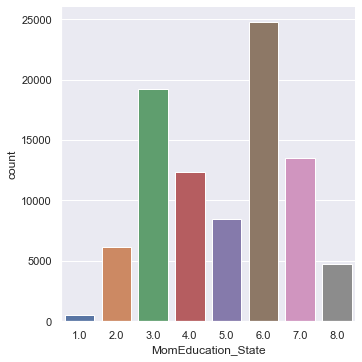

In [174]:
sns.catplot(x="MomEducation_State", kind="count", data=momi)

[Text(0.5, 0, 'Education Status'), Text(0, 0.5, 'Eclampsia (%)')]

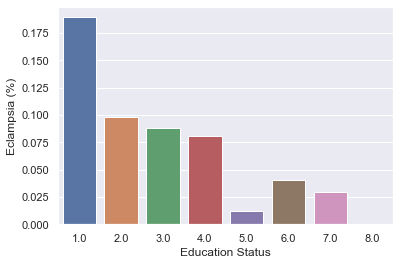

In [173]:
education = (momi.groupby('MomEducation_State')['Eclampsia'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(x=education.index, y=education.values)
ax.set(xlabel='Education Status',ylabel='Eclampsia (%)')

[Text(0.5, 0, 'Education Status'), Text(0, 0.5, 'Eclampsia (%)')]

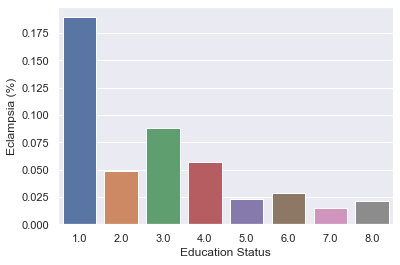

In [172]:
education = (momi.groupby('DadEducation_State')['Eclampsia'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(x=education.index, y=education.values)
ax.set(xlabel='Education Status',ylabel='Eclampsia (%)')

[Text(0.5, 0, 'Education Status'), Text(0, 0.5, 'Preeclampsia (%)')]

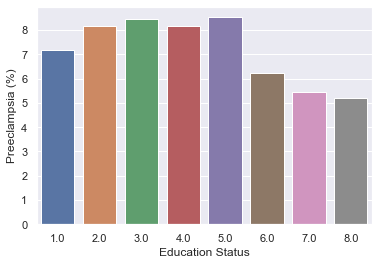

In [171]:
education = (momi.groupby('MomEducation_State')['Preeclampsia'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(x=education.index, y=education.values)
ax.set(xlabel='Education Status',ylabel='Preeclampsia (%)')

[Text(0.5, 0, 'Education Status'), Text(0, 0.5, 'Preeclampsia (%)')]

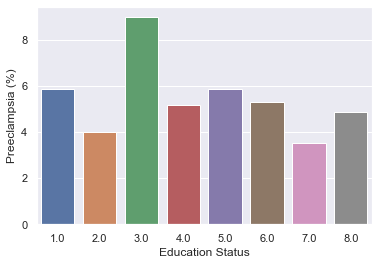

In [170]:
education = (momi.groupby('DadEducation_State')['Preeclampsia'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(x=education.index, y=education.values)
ax.set(xlabel='Education Status',ylabel='Preeclampsia (%)')

[Text(0.5, 0, 'Education Status'), Text(0, 0.5, 'Mild_PE (%)')]

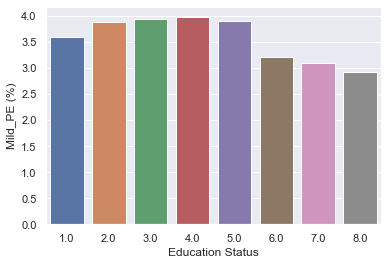

In [169]:
education = (momi.groupby('MomEducation_State')['Mild_PE'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(x=education.index, y=education.values)
ax.set(xlabel='Education Status',ylabel='Mild_PE (%)')

[Text(0.5, 0, 'Education Status'), Text(0, 0.5, 'Mild_PE (%)')]

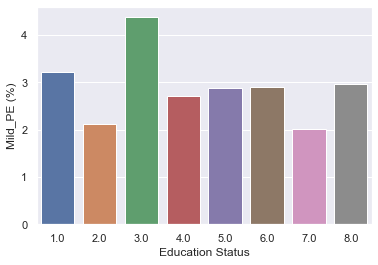

In [168]:
education = (momi.groupby('DadEducation_State')['Mild_PE'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(x=education.index, y=education.values)
ax.set(xlabel='Education Status',ylabel='Mild_PE (%)')

[Text(0.5, 0, 'Education Status'), Text(0, 0.5, 'Severe PE (%)')]

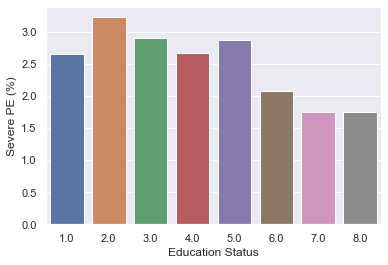

In [167]:
education = (momi.groupby('MomEducation_State')['Severe_PE'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(x=education.index, y=education.values)
ax.set(xlabel='Education Status',ylabel='Severe PE (%)')

[Text(0.5, 0, 'Education Status'), Text(0, 0.5, 'Severe PE (%)')]

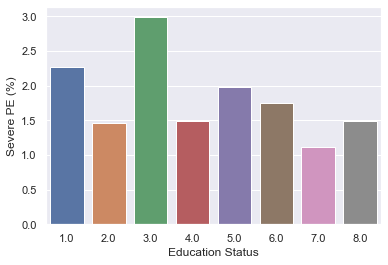

In [166]:
education = (momi.groupby('DadEducation_State')['Severe_PE'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(x=education.index, y=education.values)
ax.set(xlabel='Education Status',ylabel='Severe PE (%)')

[Text(0.5, 0, 'Education Status'), Text(0, 0.5, 'SIPE (%)')]

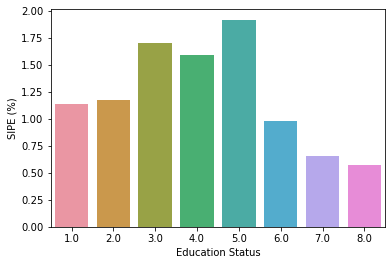

In [38]:
education = (momi.groupby('MomEducation_State')['SIPE'].sum())/momi.MomEducation_State.value_counts()*100
ax = sns.barplot(x=education.index, y=education.values)
ax.set(xlabel='Education Status',ylabel='SIPE (%)')

[Text(0.5, 0, 'Education Status'), Text(0, 0.5, 'SIPE (%)')]

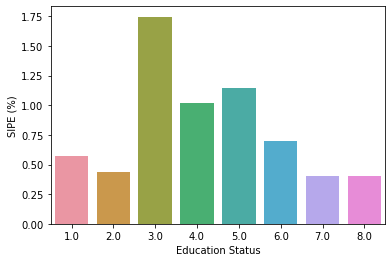

In [69]:
education = (momi.groupby('DadEducation_State')['SIPE'].sum())/momi.MomEducation_State.value_counts()*100
ax = sns.barplot(x=education.index, y=education.values)
ax.set(xlabel='Education Status',ylabel='SIPE (%)')

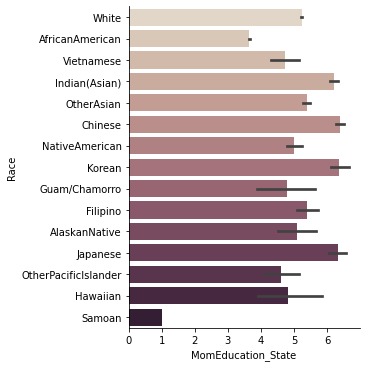

In [72]:
# I don't think this quite captures what I want it to
sns.catplot(x="MomEducation_State", y='Race', kind="bar", palette="ch:.25", data=momi)

In [62]:
momi.groupby('Race')['MomEducation_State'].value_counts(normalize=True).unstack()

MomEducation_State,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
Race,,,,,,,,
AfricanAmerican,0.008612,0.162479,0.391004,0.212726,0.099726,0.092430,0.025617,0.007405
AlaskanNative,0.022727,0.090909,0.204545,0.090909,0.022727,0.272727,0.204545,0.090909
Chinese,0.013643,0.021828,0.090041,0.016371,0.013643,0.263302,0.304229,0.276944
Filipino,NaN,0.035398,0.150442,0.159292,0.079646,0.318584,0.115044,0.141593
Guam/Chamorro,NaN,0.105263,0.368421,NaN,NaN,0.315789,0.105263,0.105263
Hawaiian,NaN,0.083333,0.166667,0.250000,0.083333,0.250000,0.083333,0.083333
Indian(Asian),0.009079,0.022049,0.105058,0.020752,0.015564,0.285344,0.372244,0.169909
Japanese,NaN,NaN,0.053763,0.021505,0.010753,0.580645,0.118280,0.215054
Korean,0.017857,NaN,0.035714,0.062500,0.017857,0.410714,0.196429,0.258929


## Age Data

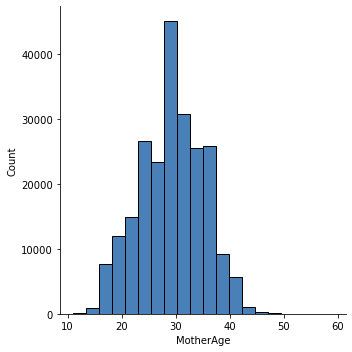

In [94]:
sns.color_palette('bright')
sns.displot(momi, x="MotherAge", bins=20)

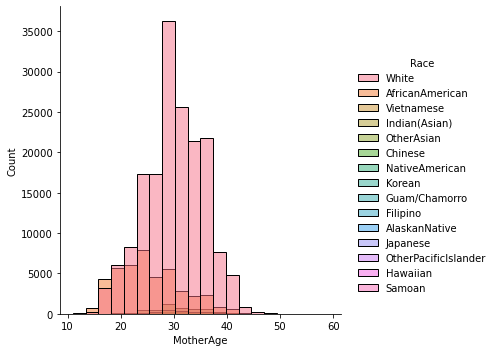

In [95]:
sns.displot(momi, x="MotherAge", hue="Race", bins=20, fill=True)

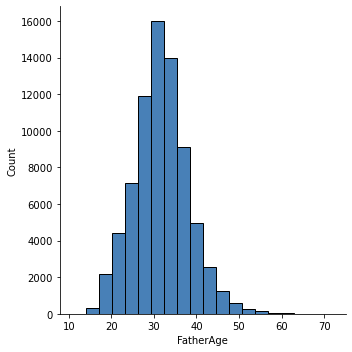

In [89]:
sns.displot(momi, x="FatherAge", bins=20)

In [82]:
momi['FatherAge'].describe()

count    88457.000000
mean        42.166951
std         24.912864
min         11.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         99.000000
Name: FatherAge, dtype: float64

In [88]:
# 99 probably means missing in this dataset
momi['FatherAge'].value_counts()

31.0    5549
32.0    5391
33.0    5102
30.0    5058
34.0    4690
29.0    4638
35.0    4185
28.0    4011
36.0    3547
27.0    3277
37.0    3054
26.0    2779
38.0    2487
25.0    2339
24.0    2039
39.0    1999
23.0    1731
40.0    1649
22.0    1439
41.0    1302
21.0    1240
42.0    1029
20.0     986
43.0     830
19.0     781
44.0     676
45.0     521
46.0     426
18.0     420
47.0     319
48.0     269
17.0     209
49.0     166
50.0     148
51.0     100
52.0      80
16.0      71
53.0      55
54.0      54
55.0      39
56.0      36
15.0      27
57.0      24
58.0      23
59.0      11
61.0       9
60.0       9
62.0       6
14.0       6
63.0       4
65.0       3
67.0       2
13.0       1
11.0       1
72.0       1
64.0       1
Name: FatherAge, dtype: int64

In [87]:
momi['FatherAge'] = np.where(momi['FatherAge'] == 99, np.NaN, momi['FatherAge'])

## Racial Data

In [96]:
momi['RaceCollapsed'] = np.NaN

AsianGroups = ['OtherAsian','Indian(Asian)','Chinese','Korean','Filipino','Japanese','Vietnamese']
Polynesian = ['Hawaiian','Samoan','OtherPacificIslander','Guam/Chamorro'] #Unsure about Guam
NativeGroups = ['NativeAmerican','AlaskanNative']

#Asian
momi['RaceCollapsed'] = np.where((momi['Race'].isin(AsianGroups)), 'Asian',momi['RaceCollapsed'])
#Polynesian
momi['RaceCollapsed'] = np.where((momi['Race'].isin(Polynesian)), 'Polynesian',momi['RaceCollapsed'])
#Native
momi['RaceCollapsed'] = np.where((momi['Race'].isin(NativeGroups)), 'Native',momi['RaceCollapsed'])
#African
momi['RaceCollapsed'] = np.where((momi['Race']=='AfricanAmerican'), 'African',momi['RaceCollapsed'])
#White
momi['RaceCollapsed'] = np.where((momi['Race']=='White'), 'White',momi['RaceCollapsed'])

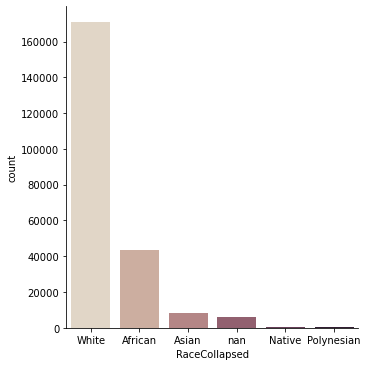

In [97]:
sns.catplot(x="RaceCollapsed", kind="count", palette="ch:.25", data=momi)

<AxesSubplot:xlabel='RaceCollapsed', ylabel='MotherAge'>

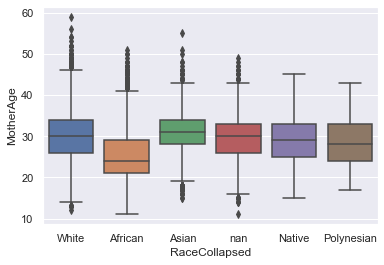

In [123]:
sns.set(font_scale=1) 
sns.boxplot(x="RaceCollapsed", y="MotherAge", data=momi)

[Text(0.5, 0, 'Race'), Text(0, 0.5, 'Preeclampsia (%)')]

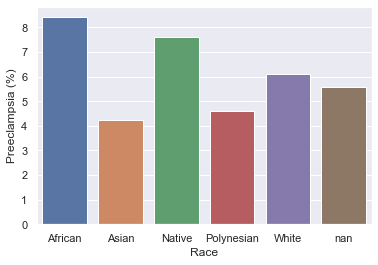

In [151]:
raceCollapsed = (momi.groupby('RaceCollapsed')['Preeclampsia'].sum())/momi.RaceCollapsed.value_counts().sort_index()*100
ax = sns.barplot(x=raceCollapsed.index, y=raceCollapsed.values)
ax.set(xlabel='Race',ylabel='Preeclampsia (%)')

[Text(0.5, 0, 'Race'), Text(0, 0.5, 'Eclampsia (%)')]

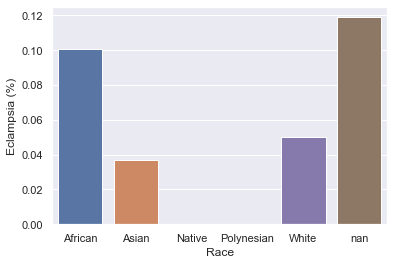

In [152]:
raceCollapsed = (momi.groupby('RaceCollapsed')['Eclampsia'].sum())/momi.RaceCollapsed.value_counts().sort_index()*100
ax = sns.barplot(x=raceCollapsed.index, y=raceCollapsed.values)
ax.set(xlabel='Race',ylabel='Eclampsia (%)')

[Text(0.5, 0, 'Race'), Text(0, 0.5, 'Mild_PE (%)')]

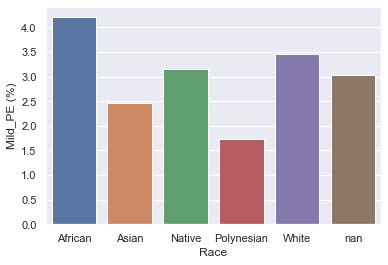

In [153]:
raceCollapsed = (momi.groupby('RaceCollapsed')['Mild_PE'].sum())/momi.RaceCollapsed.value_counts().sort_index()*100
ax = sns.barplot(x=raceCollapsed.index, y=raceCollapsed.values)
ax.set(xlabel='Race',ylabel='Mild_PE (%)')

[Text(0.5, 0, 'Race'), Text(0, 0.5, 'Severe_PE (%)')]

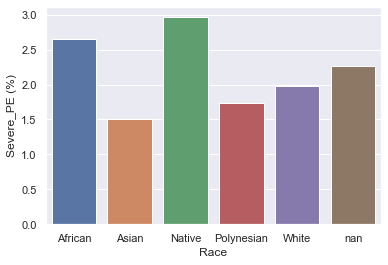

In [157]:
raceCollapsed = (momi.groupby('RaceCollapsed')['Severe_PE'].sum())/momi.RaceCollapsed.value_counts().sort_index()*100
ax = sns.barplot(x=raceCollapsed.index, y=raceCollapsed.values)
ax.set(xlabel='Race',ylabel='Severe_PE (%)')

[Text(0.5, 0, 'Race'), Text(0, 0.5, 'SIPE (%)')]

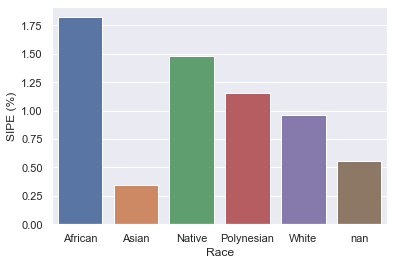

In [156]:
raceCollapsed = (momi.groupby('RaceCollapsed')['SIPE'].sum())/momi.RaceCollapsed.value_counts().sort_index()*100
ax = sns.barplot(x=raceCollapsed.index, y=raceCollapsed.values)
ax.set(xlabel='Race',ylabel='SIPE (%)')

In [178]:
list(momi.columns)

['MOMI_ID',
 'Delivery_Number_Per_Mother',
 'DeliveryYear',
 'Has_Prenatal_Data',
 'Has_Ultrasound_PlacLoc',
 'MotherAge',
 'FatherAge',
 'MomEducation_State',
 'DadEducation_State',
 'NumCig3MoPriorToPreg_State',
 'NumCigFirstTri_State',
 'NumCigSecondTri_State',
 'NumCigThirdTri_State',
 'Smoke_a',
 'Smoke_b',
 'Alcohol_a',
 'Race',
 'Ethnicity',
 'Insurance',
 'GestAgeDelivery',
 'TotalNumPregnancies',
 'DeliveriesPriorAdmission',
 'TotalAbortions',
 'Primagrivada',
 'MaternalHeightMeters',
 'PrePregWeight',
 'WeightAtAdmission',
 'HoursLaborToDelivery',
 'HoursMembraneReptureDelivery',
 'RepeatCesarean',
 'DeliveryMethod',
 'OutcomeOfDelivery',
 'SINGLETON',
 'FetalDeath',
 'MaternalNeuromuscularDisease',
 'MCollagenVascularDisease',
 'MStructuralHeartDiseas',
 'ChronicHypertension',
 'PregRelatedHypertension',
 'Gest_HTN',
 'Mild_PE',
 'Severe_PE',
 'SIPE',
 'Unspecified_HTN',
 'MPostPartumComplications',
 'Depression',
 'DiabetesMellitus',
 'ThyroidDisease',
 'HyperemesisGravidar

## Prenatal Information

<AxesSubplot:xlabel='Preeclampsia', ylabel='SystolicAvg'>

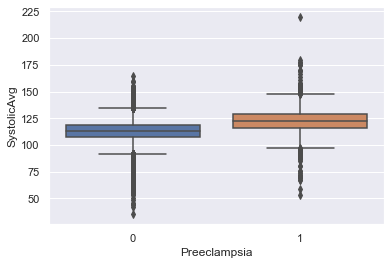

In [179]:
sns.boxplot(x="Preeclampsia", y="SystolicAvg", data=momi)

<AxesSubplot:xlabel='Preeclampsia', ylabel='DiastolicAvg'>

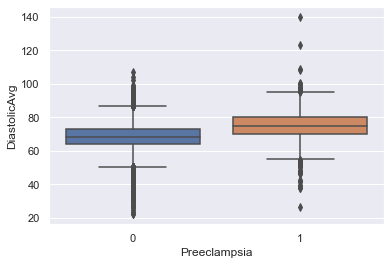

In [180]:
sns.boxplot(x="Preeclampsia", y="DiastolicAvg", data=momi)

<AxesSubplot:xlabel='Preeclampsia', ylabel='PNV_Total_Number'>

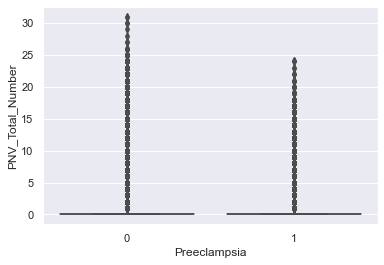

In [192]:
# Not super informative since most don't have prenatal visits. How look at distribution in just those? 
sns.boxplot(x="Preeclampsia", y="PNV_Total_Number", data=momi)

In [193]:
prenatalPlus = momi.dropna(subset=['PNV_Total_Number'])

<AxesSubplot:xlabel='Preeclampsia', ylabel='PNV_Total_Number'>

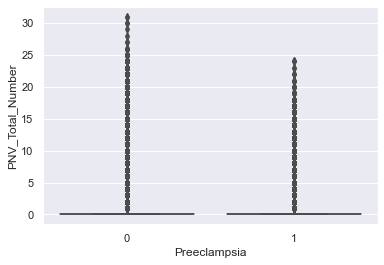

In [194]:
# Still not very informative
sns.boxplot(x="Preeclampsia", y="PNV_Total_Number", data=prenatalPlus)